## Exportación y Carga del Dataset Adult

In [7]:
import pandas as pd

# URL del dataset en el repositorio de UCI
url = "adult/adult.data"
columnas = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
            "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
            "hours-per-week", "native-country", "income"]
# Leer CSV y limpiar espacios / valores faltantes
df = pd.read_csv(url, names=columnas, na_values="?", skipinitialspace=True)

Eliminamos filas con valores faltantes

In [8]:
df = df.dropna()

Tratamiento de variables categoricas

education: La columna education se retira porque la información de nivel educativo ya está representada en education-num, que es numérica. Mantener ambas sería redundante y podría sesgar el clustering.

native-country:se recomienda eliminar native-country porque tiene demasiadas categorías y está muy desbalanceada (casi 90% son United-States), lo que aumenta la dimensionalidad sin aportar información significativa y puede afectar la estabilidad de los clusters.

occupation:La columna occupation se retira porque tiene muchas categorías, algunas con muy pocos registros o valores faltantes (?). Esto aumenta la dimensionalidad innecesariamente y aporta poca información relevante para el clustering, afectando la estabilidad de los clusters en k-means.

marital-status:La columna marital-status se retira porque muchas de sus categorías tienen muy pocos registros y, además, gran parte de la información relevante ya se refleja en otras variables del dataset. Mantenerla aumentaría la complejidad sin aportar información significativa para el clustering.

workclass: La columna workclass se retira porque tiene muchas categorías con pocos registros y valores faltantes (?). Además, aproximadamente el 70% de los registros corresponden a Private, lo que genera un desbalance importante. En k-means, esta falta de variabilidad hace que las categorías minoritarias tengan un efecto casi nulo en la formación de clusters, otra razón para eliminarla.

relationship:La columna relationship se retira porque varias de sus categorías tienen porcentajes bajos y gran parte de la información ya está representada en otras variables del dataset. Mantenerla aumentaría la complejidad y aportaría poca variabilidad para el clustering con k-means, por lo que se considera innecesaria.

race:La columna race sí se conserva porque, aunque algunas categorías son minoritarias, representa información relevante sobre diversidad étnica. Esto puede aportar variabilidad significativa para el clustering y no genera un desbalance extremo como otras columnas que se eleminaron.

sex: La columna sex se conserva porque tiene solo dos categorías y aporta información relevante sobre género. Ya que contribuye a la variabilidad entre los registros.

## 4:  El script debe realizar un agrupamiento o clustering con K-means

In [ ]:
import pandas as pd

# 1. Definir las columnas numéricas a utilizar
# Se excluye fnlwgt ya que no representa a un individuo en sí
# Sino a cuanta población representa ese registro
# Este valor puede introducir un sesgo si las distancias son muy grandes
numerical_cols_k_means = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 2. Crear el nuevo DataFrame para K-Means
df_kmeans = df[numerical_cols_k_means].copy()

In [12]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Estandarizando los valores numéricos con MinMaxScaler
# Se excluye fnlwgt ya que no representa a un individuo en sí
# Sino a cuanta población representa ese registro
# Este valor puede introducir un sesgo si las distancias son muy grandes

# 1. Definir las columnas numéricas que usará K-Means
numerical_cols_k_means = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Crear el DataFrame de trabajo para K-Means
df_kmeans = df[numerical_cols_k_means].copy()

# 2. Inicializar el escalador
scaler = MinMaxScaler()

# 3. Aplicar fit_transform para normalizar los datos
# Esto transforma los datos en un array de numpy
df_kmeans_scaled_array = scaler.fit_transform(df_kmeans)

# 4. Crear el nuevo DataFrame normalizado (dfKMeans)
# Usamos el array transformado y los nombres de columna originales
dfKMeans = pd.DataFrame(
    df_kmeans_scaled_array,
    columns=numerical_cols_k_means
)

Aplicar K-means

k = 2 | Silhouette Score: 0.2704 | Davies-Bouldin: 1.4761
k = 3 | Silhouette Score: 0.3030 | Davies-Bouldin: 1.1780
k = 4 | Silhouette Score: 0.3245 | Davies-Bouldin: 1.0476
k = 5 | Silhouette Score: 0.2624 | Davies-Bouldin: 1.1724
k = 6 | Silhouette Score: 0.2766 | Davies-Bouldin: 1.0698
k = 7 | Silhouette Score: 0.2886 | Davies-Bouldin: 0.9605
k = 8 | Silhouette Score: 0.2968 | Davies-Bouldin: 0.9548
k = 9 | Silhouette Score: 0.2978 | Davies-Bouldin: 0.9602
k = 10 | Silhouette Score: 0.3119 | Davies-Bouldin: 0.9237


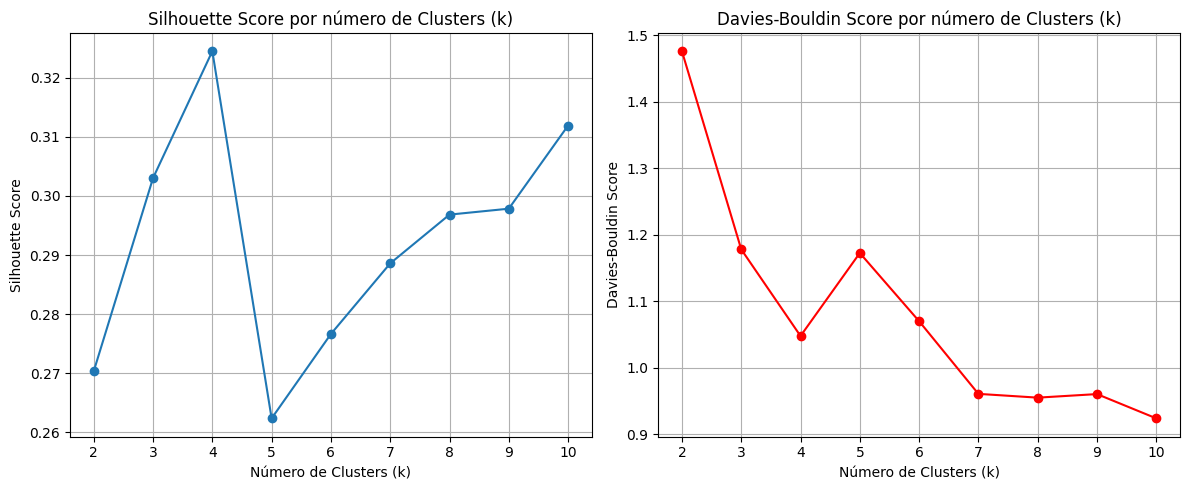


 RESULTADOS FINALES
Mejor k según Silhouette Score: 4 (valor = 0.3245)
Mejor k según Davies-Bouldin Score: 10 (valor = 0.9237)


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir un rango de valores de k (por ejemplo de 2 a 10)
rango_k = range(2, 11)

# 2. Inicializar listas para guardar los resultados
silhouette_scores = []
davies_scores = []

# 3. Probar distintos valores de k
for k in rango_k:
    # Crear el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Ajustar el modelo
    etiquetas = kmeans.fit_predict(dfKMeans)
    
    # Calcular métricas
    sil_score = silhouette_score(dfKMeans, etiquetas)
    db_score = davies_bouldin_score(dfKMeans, etiquetas)
    
    # Guardar los valores
    silhouette_scores.append(sil_score)
    davies_scores.append(db_score)

    print(f"k = {k} | Silhouette Score: {sil_score:.4f} | Davies-Bouldin: {db_score:.4f}")

# 4. Graficar los resultados
plt.figure(figsize=(12,5))

# Gráfico de Silhouette
plt.subplot(1, 2, 1)
plt.plot(rango_k, silhouette_scores, marker='o')
plt.title('Silhouette Score por número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Gráfico de Davies-Bouldin
plt.subplot(1, 2, 2)
plt.plot(rango_k, davies_scores, marker='o', color='red')
plt.title('Davies-Bouldin Score por número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Encontrar el mejor k para cada métrica
mejor_k_silhouette = rango_k[np.argmax(silhouette_scores)]   # mayor es mejor
mejor_k_davies = rango_k[np.argmin(davies_scores)]           # menor es mejor

print("\n RESULTADOS FINALES")
print(f"Mejor k según Silhouette Score: {mejor_k_silhouette} (valor = {max(silhouette_scores):.4f})")
print(f"Mejor k según Davies-Bouldin Score: {mejor_k_davies} (valor = {min(davies_scores):.4f})")



Preguntas guía: 
● ¿Qué criterios usaste para definir el número de clusters? 

Para determinar el número óptimo de clusters se utilizaron dos métricas de evaluación: el Silhouette Score y el Davies–Bouldin Index.
El Silhouette Score mide qué tan bien separadas están las observaciones entre clusters y qué tan compactos son dentro de su propio grupo; un valor más alto indica una mejor calidad de agrupamiento.
Por otro lado, el Davies–Bouldin Index evalúa tanto la compacidad (qué tan cerca están los puntos dentro de cada cluster) como la separación entre clusters; cuanto menor es su valor, mejor es el resultado.
El número final de clusters (k) se seleccionó buscando maximizar el Silhouette Score y minimizar el Davies–Bouldin Index dentro del rango de valores probados (de 2 a 10).

● ¿Qué patrones observaste en los clusters formados? 
Al aplicar el algoritmo de K-means clustering sobre las variables numéricas seleccionadas, se observaron diferencias claras entre los grupos obtenidos.
Cada cluster tiene un centroide que representa el perfil promedio de las personas que esta agrupadas.
Por ejemplo, algunos clusters agrupan individuos con mayor nivel educativo, más horas trabajadas y mayores ingresos de capital, mientras que otros reflejan perfiles con menor educación, menos horas trabajadas y bajos ingresos.
Esto muestra cómo K-means permite segmentar a la población en perfiles socioeconómicos distintos en función de variables numéricas clave.


● ¿Qué limitaciones tiene K-means al ignorar las variables categóricas? 
Una limitación importante es que K-means utiliza distancias euclidianas, por lo que no puede manejar variables categóricas directamente.
Esto significa que información relevante, como el sexo, la raza o el tipo de empleo, no fue considerada en la formación de los clusters.
Como resultado, algunos patrones sociales y demográficos podrían no haberse capturado completamente, reduciendo la riqueza interpretativa de los grupos formados.
En estos casos, podría ser útil aplicar métodos que admitan variables mixtas, como el algoritmo de K-prototypes o utilizar técnicas de codificación adecuadas para incorporar categorías a K-means.